# Support Vector Machines Part 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing

In [2]:
%config InlineBackend.figure_formats = ['svg']

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cmap= mpl.colors.ListedColormap(['red', 'black', 'blue'])

## Task 1 Decision Boundary from a Maximal Margin Classifier (6 points)
Let's create some synthetic data with two classes:

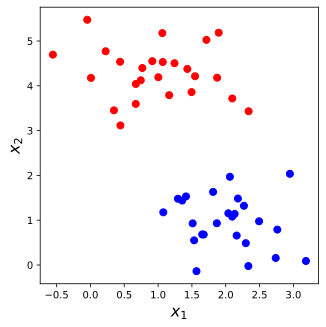

In [3]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

y[np.where(y==0)] = -1

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)

plt.show()

In this task we will use the `SVC` model of `sklearn.svm` with a `kernel=linear` and large parameter `C`. `sklearn`'s module `svm` has implementations of several Support Vector Machine algorithms. Some are meant to solve Regression, some - Classification problems. `LinearSVC` stands for Linear Support Vector Classification which is exactly what we need in order to solve the maximal margin classification problem. However, `svm.SVC` offers more flexibility in order to extract the learned parameters etc.

In [4]:
model = svm.SVC(kernel='linear', C=1000, tol=0.0001) # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

SVC(C=1000, kernel='linear', tol=0.0001)

When the optimisation has completed, you can access the parameters of the separating hyperplane. The vector $\mathbf{w}$:

In [5]:
model.coef_
print(model.coef_.shape)

(1, 2)


The $b$:

In [6]:
model.intercept_

array([3.2961071])

The indices of the support vectors:

In [7]:
model.support_
# sv indices auslesen

array([18, 25,  7], dtype=int32)

So you can slice $\mathbf{X}$ for the corresponding coordinates

In [8]:
X[model.support_]

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

or get them directly:

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Task 1A** Calculate $y^{(m)}\left(b+w^Tx^{(m)}\right)$ for every support vector. Please explain whether the result complies with your expectation and why?
 Report the calculated values and your explanation from Task 1A.

In [10]:
# war Bedingung 2 in den Notizen auf den Slides: y(wx+b) - 1 >= 0

In [11]:
w = model.coef_[0]
w_norm = np.linalg.norm(w)
b = model.intercept_[0]
y[model.support_] * (np.dot(w, X[model.support_].T) + b) # dot weil es Vektoren sind, also Skalarprodukt
# für sv sollte das 1 sein..., darf man aufrunden, das sind numerische Fehler, siehe toleranz im fitting oben angegeben

array([0.99996393, 1.00001735, 0.99998206])

To find $=1$ was expected. When deriving the optimisation problem Eq. 6.8 was scaled such that such that $y^{(m)}f(\mathbf{x}^{(m)})=1$ for the point(s) closest to the decision boundary, i.e. the support vectors.

**Task 1B** Calculate the distance from the decision boundary to the support vectors, i.e. the width of the margin
Report the width of the margin calculated in Task 1B.

The (signed) perpendicular distances of the hyperplane to any point $\mathbf{x}$:
$$r=\frac{(b+w^T\mathbf{x})}{||\mathbf{w}||}$$
Insert the positions of the support vectors and multiply by $y^{(m)}$ to get the unsigned distance

In [12]:
dists = y[model.support_] * (np.dot(w, X[model.support_].T) + b)/w_norm
dists
# alle Distanzenn sind gleich, weil es die Punkte auf dem Strassenrand sind

array([0.69827859, 0.6983159 , 0.69829126])

This is the same for all support vectors!

**Task 1C** Generate a scatterplot with the data $X$, the decision boundary and the gutters like in
https://github.zhaw.ch/pages/doem/mldm_book/06_svm.html#fig-max-margin
using the optimised parameters `model.interecept_` and `model.coef_[0]`

In [13]:
# the decision boundary
def dec_b(x, b, w1, w2):
    return - b/w2 - w1/w2 * x


points_dec_b = np.array([[-2, 0.0],
                         [4, 0.0]
                        ], dtype=float) # siehe plot oben wie die Linie durch geht, sollte passen...

points_dec_b[:,1] = np.vectorize(dec_b, excluded=('b', 'w0', 'w1'))(points_dec_b[:,0], b, w[0], w[1])

dist = dists[0]

# gutters = Strassenränder
# just taking the perpendicular distance of the first support vector. They should be (numerically) the same!
gutter_pos_start = points_dec_b[0] + w/w_norm * dist
gutter_pos_end = points_dec_b[1] + w/w_norm * dist

gutter_neg_start = points_dec_b[0] - w/w_norm * dist
gutter_neg_end = points_dec_b[1] - w/w_norm * dist

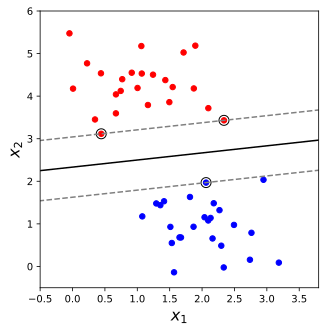

In [14]:
x_min, x_max, y_min, y_max = -0.5, 3.8, -0.5, 6

fig, ax = plt.subplots(figsize=(5, 5))

# the data
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)

# decision boundary
ax.plot(points_dec_b[:,0], points_dec_b[:,1], color='black') # wir haben nur zwei Punkte gewählt, darum wird die Gerade durch diese gehen

# the gutters
ax.plot([gutter_pos_start[0], gutter_pos_end[0]], [gutter_pos_start[1], gutter_pos_end[1]], color='grey', ls='--')
ax.plot([gutter_neg_start[0], gutter_neg_end[0]], [gutter_neg_start[1], gutter_neg_end[1]], color='grey', ls='--')

# black circle around the support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="black",
)

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)

plt.show()

## Task 2 Large Margin Classifier on the Wine Dataset (4 points)
This dataset `sklearn.datasets.load_wine()` contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

In [15]:
wine = datasets.load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

**TASK 2A**: Train an SVM on the dataset and report the accuracy

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [17]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [18]:
y_train.head()
# 3 Klassen, also eine zu viel für SVM, aber wir können das handeln...

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

Let's start simple, with a linear SVM classifier. SVC will automatically use the One-vs-All strategy, so there's nothing special we need to do to handle multiple classes.

Calulate the accuracy:

In [19]:
from sklearn.model_selection import cross_val_score
model = svm.SVC(kernel='linear', C=1000, tol=0.0001, random_state=42) # initialize the model # cross validation
model.fit(X_train, y_train) # fit the model = learn the decision boundaries

#Accuracy:

print(cross_val_score(model, X_train, y_train).mean())



from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(

    wine.data, wine.target, random_state=42)

X_train.head()

y_train.head()

model = svm.SVC(kernel='linear', C=1000, tol=0.0001, random_state=42) # initialize the model



# Train the model on the training data

model.fit(X_train, y_train)



# Teil 1

from sklearn.model_selection import cross_val_score



# Perform 5-fold cross-validation and calculate accuracy

accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy over all folds

mean_accuracy = accuracies.mean()

print(f"Mean Accuracy: {mean_accuracy}%")


0.9176638176638177
Mean Accuracy: 0.9176638176638177%



Report the accuracy that you reached in task 2A without feature scaling.

**Task 2B** Which accuracy can you reach when you standarize the features before training?

In [21]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(preprocessing.StandardScaler(), # meistens sinnvoll, da meistens Normalverteilungen, hier auch
                      # warum nicht der RobustScaler mit average anstatt median?
                      # weil median oft sehr ähnlich zu mean, in dem Fall ist das Scaling gleich
                      # falls Daten sehr skewed, dann gibt es einen Unterschied
                     svm.SVC(kernel='linear', C=10000000, tol=0.0001, random_state=42))
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train).mean()

0.9772079772079773


2B Report the accuracy that you reached with feature standaridsation.

We get 0.98